CSC 820  
Homework 13  
Andrew Dahlstrom  
5/13/2024  


In [1]:
import pandas as pd

def load_yelp_orig_data():
    PATH_TO_YELP_REVIEWS = '/content/drive/MyDrive/Colab Notebooks/CSC 820/yelp_academic_dataset_review.json'

    # Initialize an empty list to store the lines
    data = []

    # Read only the first 10,000 lines from the file
    with open(PATH_TO_YELP_REVIEWS, 'r') as f:
        for i in range(100000):
            line = f.readline().strip()
            if not line:
                break
            data.append(line)

    data_json_str = "[" + ','.join(data) + "]"

    # Load the data into a pandas DataFrame
    data_df = pd.read_json(data_json_str)

    # Save the first 100000 rows to a new file
    data_df.to_csv('/content/drive/MyDrive/Colab Notebooks/CSC 820/yelp_top_reviews.json', index=False)

load_yelp_orig_data()

In [2]:
top_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSC 820/yelp_top_reviews.json')
print("Columns in the original dataset:\n")
print(top_data_df.columns)

Columns in the original dataset:

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


Number of rows per star rating:
stars
5    44392
4    25337
3    11362
1    10921
2     7988
Name: count, dtype: int64


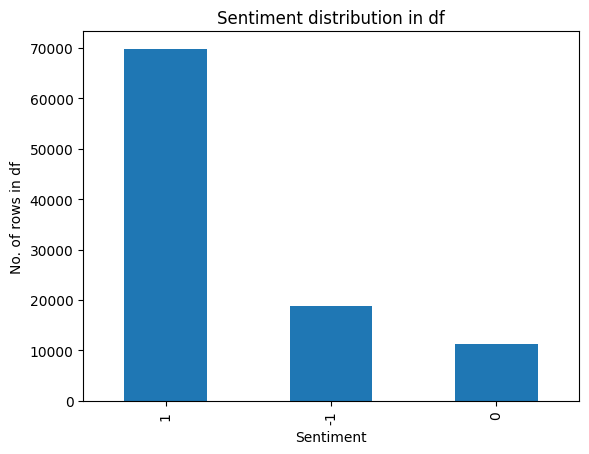

In [3]:
import matplotlib.pyplot as plt

print("Number of rows per star rating:")
print(top_data_df['stars'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
top_data_df['sentiment'] = [ map_sentiment(x) for x in top_data_df['stars']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(top_data_df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [4]:
# Function to retrieve top few number of each category
def get_top_data(top_n = 5000):
    top_data_df_positive = top_data_df[top_data_df['sentiment'] == 1].head(top_n)
    top_data_df_negative = top_data_df[top_data_df['sentiment'] == -1].head(top_n)
    top_data_df_neutral = top_data_df[top_data_df['sentiment'] == 0].head(top_n)
    top_data_df_small = pd.concat([top_data_df_positive, top_data_df_negative, top_data_df_neutral])
    return top_data_df_small

# Function call to get the top 10000 from each sentiment
top_data_df_small = get_top_data(top_n=10000)

# After selecting top few samples of each sentiment
print("After segregating and taking equal number of rows for each sentiment:")
print(top_data_df_small['sentiment'].value_counts())
top_data_df_small.head(10)

After segregating and taking equal number of rows for each sentiment:
sentiment
 1    10000
-1    10000
 0    10000
Name: count, dtype: int64


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,1
10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,1
11,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,1
12,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,1
13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,1
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05,1


In [5]:
# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords
print(remove_stopwords("Restaurant had a really good service!!"))
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good!!"))

Restaurant good service!!
I like food!!
This product good!!


In [6]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
top_data_df_small['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in top_data_df_small['text']]
print(top_data_df_small['tokenized_text'].head(10))

1     [ve, taken, lot, of, spin, classes, over, the,...
3     [wow, yummy, different, delicious, our, favori...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [loved, this, tour, grabbed, groupon, and, the...
7     [amazingly, amazing, wings, and, homemade, ble...
10    [my, experience, with, shalimar, was, nothing,...
11    [locals, recommended, milktooth, and, it, an, ...
12    [love, going, here, for, happy, hour, or, dinn...
13    [good, food, loved, the, gnocchi, with, marina...
14    [the, bun, makes, the, sonoran, dog, it, like,...
Name: tokenized_text, dtype: object


In [7]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
top_data_df_small['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in top_data_df_small['tokenized_text'] ]
top_data_df_small['stemmed_tokens'].head(10)

1     [ve, taken, lot, of, spin, class, over, the, y...
3     [wow, yummi, differ, delici, our, favorit, is,...
4     [cute, interior, and, owner, gave, us, tour, o...
6     [love, thi, tour, grab, groupon, and, the, pri...
7     [amazingli, amaz, wing, and, homemad, bleu, ch...
10    [my, experi, with, shalimar, wa, noth, but, wo...
11    [local, recommend, milktooth, and, it, an, ama...
12    [love, go, here, for, happi, hour, or, dinner,...
13    [good, food, love, the, gnocchi, with, marinar...
14    [the, bun, make, the, sonoran, dog, it, like, ...
Name: stemmed_tokens, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id', 'stemmed_tokens']],
                                                        top_data_df_small['sentiment'],
                                                        shuffle=shuffle_state,
                                                        test_size=test_size,
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(top_data_df_small)

Value counts for Train sentiments
sentiment
 1    7036
-1    7008
 0    6956
Name: count, dtype: int64
Value counts for Test sentiments
sentiment
 0    3044
-1    2992
 1    2964
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index             business_id  cool                 date  funny  \
0  41964  h7zxeLAdUyAO6S6UzXJDwA     0  2018-05-20 02:15:46      0   
1  21237  ySXKjndttZjNy3kcqRqG3g     0  2015-12-20 20:30:12      0   
2  43742  9gObo5ltOMo6UgsaXaHPWA     0  2015-12-05 23:57:22      0   
3  35107  tvbFcYCEQWc76CUK-nBw8w     0  2018-07-27 08:09:21      0   
4   2960  Yv6HUVu7fRMnt_NtGdVQBw     0  2018-06-19 18:16:51      0   

                review_id  stars  \
0  xkcYjM_5w9rdSiN8_Qz_Tg      1   
1  XIYnB19-LAI_yzJfB2d7eQ      3   
2  Nm2XaG0sQ7p3LHoZG44cAg      1   
3  L8Ape_IoEHiMjgiufwCp8Q      3   
4  0uD1hdeUNPyfAaGOKpMMeQ      5   

                                                text  useful  \
0  Kids talking and

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [10]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()

        # Linear function 1: vocab_size --> 500
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 500 --> 500
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 500 --> 3
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)

        return F.softmax(out, dim=1)

In [11]:
from gensim import corpora
# Function to return the dictionary either with padding word or without padding
def make_dict(top_data_df_small, padding=True):
    if padding:
        print("Dictionary with padded token added")
        review_dict = corpora.Dictionary([['pad']])
        review_dict.add_documents(top_data_df_small['stemmed_tokens'])
    else:
        print("Dictionary without padding")
        review_dict = corpora.Dictionary(top_data_df_small['stemmed_tokens'])
    return review_dict

# Make the dictionary without padding for the basic models
review_dict = make_dict(top_data_df_small, padding=False)

Dictionary without padding


In [13]:
VOCAB_SIZE = len(review_dict)
NUM_LABELS = 3

# Function to make bow vector to be used as input to network
def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

In [14]:
# Function to get the output tensor for a given label
def make_target(label):
    if label == -1:
        # If the label is -1, return a tensor with value 0 (class 0)
        return torch.tensor([0], dtype=torch.long, device=device)
    elif label == 0:
        # If the label is 0, return a tensor with value 1 (class 1)
        return torch.tensor([1], dtype=torch.long, device=device)
    else:
        # If the label is any other value (assumed to be 1), return a tensor with value 2 (class 2)
        return torch.tensor([2], dtype=torch.long, device=device)

In [22]:
# Get the size of the vocabulary from the review dictionary
VOCAB_SIZE = len(review_dict)

# Set the dimensions for the input, hidden, and output layers of the neural network
input_dim = VOCAB_SIZE
hidden_dim = 300
output_dim = 3

# Set the number of epochs for training the model
num_epochs = 50

# Initialize the feedforward neural network model with the specified dimensions
ff_nn_bow_model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

# Move the model to the specified device (GPU if available, otherwise CPU)
ff_nn_bow_model.to(device)

# Define the loss function (Cross Entropy Loss for classification)
loss_function = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent with a learning rate of 0.01)
optimizer = optim.SGD(ff_nn_bow_model.parameters(), lr=0.01)

In [24]:
# Open the file for writing loss
ffnn_loss_file_name = '/content/drive/MyDrive/Colab Notebooks/CSC 820/ffnn_bow_class_big_loss_500_epoch_100_less_lr.csv'
f = open(ffnn_loss_file_name,'w')
f.write('iter, loss')
f.write('\n')
losses = []
iter = 0
# Use mini-batch training
batch_size = 64

# Start training
for epoch in range(num_epochs):
    if (epoch + 1) % 10 == 0:
        print("Epoch completed: " + str(epoch + 1))
    train_loss = 0

    for i in range(0, len(X_train), batch_size):
        batch_X = X_train.iloc[i:i+batch_size]
        batch_Y = Y_train.iloc[i:i+batch_size]

        optimizer.zero_grad()

        # Initialize batch vectors and targets
        batch_vec = torch.zeros((len(batch_X), VOCAB_SIZE), dtype=torch.float32, device=device)
        batch_targets = torch.zeros(len(batch_X), dtype=torch.long, device=device)

        for j, row in enumerate(batch_X.itertuples()):
            bow_vec = make_bow_vector(review_dict, row.stemmed_tokens)
            batch_vec[j] = bow_vec
            batch_targets[j] = make_target(batch_Y['sentiment'].iloc[j])

        # Forward pass
        probs = ff_nn_bow_model(batch_vec)

        # Calculate loss
        loss = loss_function(probs, batch_targets)
        train_loss += loss.item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    f.write(f"{epoch + 1},{train_loss / len(X_train)}\n")

f.close()

Epoch completed: 10
Epoch completed: 20
Epoch completed: 30
Epoch completed: 40
Epoch completed: 50


In [25]:
from sklearn.metrics import classification_report

# Initialize lists to store predictions and original labels
bow_ff_nn_predictions = []
original_lables_ff_bow = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    for index, row in X_test.iterrows():
        # Create the bag-of-words vector for the test sample
        bow_vec = make_bow_vector(review_dict, row['stemmed_tokens'])

        # Get the model's predictions (probabilities)
        probs = ff_nn_bow_model(bow_vec)

        # Append the predicted class (with highest probability) to the predictions list
        bow_ff_nn_predictions.append(torch.argmax(probs, dim=1).cpu().numpy()[0])

        # Append the true label to the original labels list
        original_lables_ff_bow.append(make_target(Y_test['sentiment'][index]).cpu().numpy()[0])

# Print the classification report comparing true labels and predictions
print(classification_report(original_lables_ff_bow, bow_ff_nn_predictions))

# Read the loss values from the CSV file
ffnn_loss_df = pd.read_csv(ffnn_loss_file_name)

# Print the number of entries in the loss DataFrame
print(len(ffnn_loss_df))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2992
           1       0.67      0.61      0.64      3044
           2       0.74      0.86      0.80      2964

    accuracy                           0.74      9000
   macro avg       0.73      0.74      0.73      9000
weighted avg       0.73      0.74      0.73      9000

50
